We can implement this previous code with class, in this case, the code would be clean.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from collections import defaultdict
import math

In [2]:
def input_dataset():
    dataset= datasets.load_iris() # Dataset normalized with Standard Deviation Scaler
    features= dataset['feature_names']
    final_dataset= pd.DataFrame(dataset['data'], columns=[features])
    final_dataset= final_dataset.assign(target= dataset['target'])
    return final_dataset

In [3]:
final_dataset= input_dataset()
final_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# final_dataset= final_dataset.iloc[:,:2]

In [5]:
np.unique(final_dataset[['target']])

array([0, 1, 2])

In [6]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (sepal length (cm),)  150 non-null    float64
 1   (sepal width (cm),)   150 non-null    float64
 2   (petal length (cm),)  150 non-null    float64
 3   (petal width (cm),)   150 non-null    float64
 4   (target,)             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


In [7]:
X_train, X_test, y_train, y_test= train_test_split(final_dataset.iloc[:, :-1]
                                                   ,final_dataset.iloc[:, -1], test_size= 0.3)

In [8]:
# Sigmoid function
val= np.arange(-10, 10 , .01)
z = 1 / ( 1+ np.exp(- val))

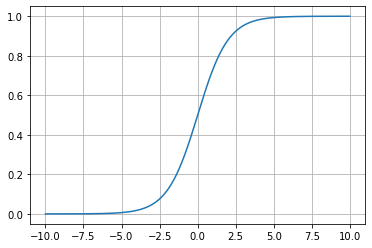

In [9]:
plt.plot(val, z)
plt.grid()
plt.show()

In [10]:
def scaler(X):
    '''
    In this function we use Standard Scaler for scaling test set and train set.
    --------------------------
    Parameter:
    X: Test set or train set
    --------------------------
    return:
    scaled data
    '''
    X_scaled= StandardScaler().fit_transform(X)
    return X_scaled

<strong>Linear Logistic Regression hypothesis:</strong>
<h2>
    <p style="color:red">
    h( <font face= "Symbol">q</font><sup>T</sup>x)= g (<font face= "Symbol">q</font><sup>T</sup>x)= <sup>1</sup>&frasl;<sub> 1 + e<sup> -<font face= "Symbol">q</font><sup>T</sup>x</sup></sub>
    </p>
</h2>

In [11]:
class LogisticRegression:
    def __init__(self, learning_rate= .04, max_iter= 15000):
        '''
        This class is LogisticRegression with full batch gradient descent algorithm and predict just Binary Class.
        for multi class dataset we jsut use OneVSRest classifier class.
        -----------------------
        Parameters:
        learning_rate(default .001): steps.please use optimized value to learning rate for faster learning and Prevent divergence.
        max_iter(default 1500): number of times that we want run gradient descent.
        <<Developer Name: Mohammad Karami Sheykhlan based on Stanford University course( Andrew Ng )>>
        '''
        self._learning_rate= learning_rate
        self._max_iter= max_iter
#         self._theta_value= []
        self._cost_value= []
        self._theta= []
        self.predict_proba= []
    #---------------------------------------------------------------------------------   
    def _sigmoid(self, X):
        '''
        This function is h_theta_x (prediction) that we use sigmoid(regression) formula.
        The formula is 1 / (1 + e ** -(X_train or X_test @ theta ))
        After finding theta's, we can use this function for predict for X_test too.
        ----------
        Parameter:
        X: X_train or X_test @ theta
        -----------
        return:
        this function return value of sigmoid function (h_x)... 
        '''
        pred= 1 / (1 + np.exp(-X))
        
        return pred
    #---------------------------------------------------------------------------------
    def _cost_function(self,X_train, y_train, theta):
        '''
        In this fucntion we calcualate cost function. We must check converge with drawing cost function.
        If it was upwards, it means that divergence has occurred.
        If it is down, it must remain constant for a while.
        va age be samte paein bud, nabayad kheyli tiz bashad  dar in surat bayad meghdare alpha ro down konim.(persian :))
        ---------------------------
        parameters:
        X_train, y_train, theta
        ---------------------------
        return:
        value of Loss function (J_theta)... 1 * 1 matrix
        '''
        m= X_train.shape[0]
        cost= (-1/m) * (y_train.T @ np.log(self._sigmoid(X_train @ theta)) + (1 - y_train.T) @ np.log(1 - self._sigmoid(X_train @ theta)))
        
        return cost[0][0]
    #---------------------------------------------------------------------------------
    def _cost_func_derivative(self, X_train, y_train, theta):
        '''
        Derivative of Cost Function for Logistic Regression:
        dJ_theta(x)⁄dtheta = 1⁄m * x.T (h_theta(x) - y)
        '''
        m= X_train.shape[0]
        deff= X_train.T @ (self._sigmoid(X_train @ theta) - y_train)

        return deff
    #-------------------------------------------------------------------------------------
    def fit(self, X_train, y_train):
        '''
        In this function we want to find optimized theta values with Gradient descent.
        Before everything, we add intercept(1) to X_train matrix then we set random values to theta.
        ---------------------
        Parameters:
        X_train: maxtirx of features that we want to learn to computer
        y_train: value of target 
        ---------------------   
        '''
        X_train= np.insert(X_train, 0, 1, axis= 1) # add new col in X_train[:, 0] value is 1
        num_of_features= X_train.shape[1]
        m=  X_train.shape[0]
        theta= np.random.rand(num_of_features, 1)
        cost_value= []
        theta_value= []

        for i in range(self._max_iter):
            cost= self._cost_function(X_train, y_train.reshape(len(X_train), 1), theta)
            self._cost_value.append(cost)
            theta= theta - (self._learning_rate * (1 / m)) * self._cost_func_derivative(X_train, y_train.reshape(len(X_train), 1), theta)
            theta_value.append(theta)
            
        self._theta= theta_value[-1]    
    #--------------------------------------------------------------------------------------
    def predict(self, X_test):
        '''
        This function return prediction values for X_test. 
        --------------------
        Parameters:
        X_test: The dataset on which we want to run the regression logistics algorithm.
        theta: FINAL value for theta.
        --------------------
        return:
        Return prediction Matrix about X_test it is 0 / 1. and returned matrix size is (m,) that m is number of X_test row.
        '''
        X_test= np.insert(X_test, 0, 1, axis= 1)
        self.predict_proba= self._sigmoid(X_test @ self._theta)
        norm_pred= np.where(self.predict_proba < .5, 0, 1) # 0 if pred < .5 else 1

        return norm_pred.ravel()
    #--------------------------------------------------------------------------------------
    def accuracy(self, y_pred, y_test):
        '''
        The model accuracy formula is: number_of_corect_prediction / number_of_all_test_set_sample
        '''
        correct_predict_count= np.equal(y_pred, y_test).sum()
        return correct_predict_count / len(y_test)
    #--------------------------------------------------------------------------------------
    def draw_cost_function(self):
        cost= np.array(self._cost_value)
        plt.plot(cost)
        plt.xlabel('Num. of iter')
        plt.ylabel('cost (J_theta)')
        plt.title('Cost Function')
        plt.show()      

In [12]:
X_train_std= scaler(X_train)
X_test_std= scaler(X_test)
lr= LogisticRegression()

In [13]:
class OneVSRestClassifier:
    def __init__(self, model):
        '''
        In this class we implement One VS. Rest(All) classifier.       
        -----------------
        Parameter:
        model: The model name that we want to use(for example: Logistic regression, SVM, MLP and etc.)
        
        << Developer Name: Mohammad Karami Sheykhlan based on Stanford University course( Andrew Ng ) >>
        '''
        self.model= model
        self.thet= []
        self.classes= 0
    def fit(self, X_train, y_train):
        '''
        In this function, for each class we calculate optimazed theta
        '''
        self.classes= np.unique(y_train)
#         print(self.classes)
        
        for index, i in enumerate(self.classes):
            new_y_test= (y_train == i).astype(int) # for 'i'th element value we put 1 and anothers 0
            self.model.fit(X_train, new_y_test) # then we find optimized value for theta for every class
            self.thet.append(self.model._theta.ravel())
#             self.model.draw_cost_function()
            self.model._cost_value= []
        self.thet= np.array(self.thet).T
        print('Theta values for every class is:\n', self.thet)
    def predict(self, X_test):
        X_test= np.insert(X_test, 0, 1, axis= 1)
        self.predict_proba= self.model._sigmoid(X_test @ self.thet)
        y_pred= np.argmax(self.predict_proba, axis= 1)
        
        return y_pred
        

In [14]:
ovr= OneVSRestClassifier(lr)

In [15]:
ovr.fit(X_train_std, y_train.values)

Theta values for every class is:
 [[-3.19673156 -0.88343559 -6.58358988]
 [-1.61701458 -0.13397421 -0.62883728]
 [ 2.47232568 -1.30768169 -0.89640889]
 [-2.98181446  2.01232     4.75554336]
 [-2.83690366 -1.72909145  5.82974284]]


In [16]:
y_pred= ovr.predict(X_test_std)

In [17]:
lr.accuracy(y_pred, y_test)

0.9555555555555556

<strong>Linear Logistic Regression Loss function:</strong>
<h2>
    <p style="color:red">
        J(<font face="Symbol">q</font>)=<sup>1</sup>&frasl;<sub>m</sub>&sum;<sup>m</sup><sub>i=1</sub>[ -y<sup>i</sup>log<sup>h<sub><font face="Symbol">q</font></sub>(x<sup>i</sup>)</sup> - ( 1 - y<sup>i</sup>)log<sup>(1 - h<font face="Symbol">q</font>(x<sup>i</sup>))</sup>]
    </p>
</h2>

<strong>
    Derivative of Cost Function for Logistic Regression:
</strong>
<h2>
    <p style="color:red">
        <sup>dJ<sub><font face="Symbol">q</font></sub>(x)</sup>&frasl;<sub>d<font face="Symbol">q</font></sub> = <sup>1</sup>&frasl;<sub>m</sub> x<sup>T</sup> (h<sub><font face="Symbol">q</font></sub>(x) - y)
    </p>
</h2>
